In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
titanic = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
print(f"Rows: {titanic.shape[0]}")
print(f"Columns: {titanic.shape[1]}")

Rows: 891
Columns: 12


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Going to drop the Cabin column because there are lots of missing values and also Ticket
<br> 
Age and Embarked will be imputated

## Handling Missing Values

In [9]:
# Dropping Cabin and Ticket
titanic = titanic.drop(["Cabin", "Ticket"], axis=1)

In [10]:
# Using mode to replace missing values in Embarked column
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

In [11]:
#  Counting unique values
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

# Numerical Data

In [13]:
# Getting the numerical columns
titanic_num = titanic.select_dtypes(include="number")

In [ ]:
num_corr = titanic_num.corr()

plt.figure(figsize=(8,5))
sns.heatmap(num_corr, annot=True)
plt.show()

# Boxplots and IQR

In [15]:
# Function for calculating iqr
def iqr(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3-q1
    upper_f = q3 + 1.5 * iqr
    lower_f = q1- 1.5 * iqr
    return iqr, q1, q3, lower_f, upper_f

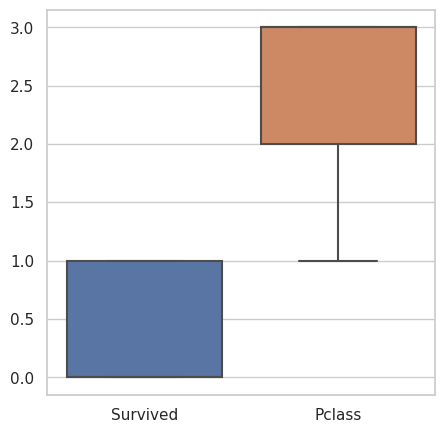

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.boxplot(titanic_num.iloc[:, 1:3])
plt.show()

In [17]:
# Survived column iqr, upper fence and lower fence
survived_iqr, survived_q1, survived_q3, survived_lf, survived_uf = iqr(titanic_num["Survived"])
print(f"Pclass:\nIQR : {survived_iqr},\nQ1: {survived_q1}\t\tQ3: {survived_q3}\nLower fence: {survived_lf},\nUpper fence: {survived_uf}")

print()
# Pclass columns iqr, upper fence, and lower fence
pclass_iqr, pclass_q1, pclass_q3, pclass_lf, pclass_uf = iqr(titanic_num["Pclass"])
print(f"Pclass:\nIQR : {pclass_iqr},\nQ1: {pclass_q1}\t\tQ3: {pclass_q3}\nLower fence: {pclass_lf},\nUpper fence: {pclass_uf}")


Pclass:
IQR : 1.0,
Q1: 0.0		Q3: 1.0
Lower fence: -1.5,
Upper fence: 2.5

Pclass:
IQR : 1.0,
Q1: 2.0		Q3: 3.0
Lower fence: 0.5,
Upper fence: 4.5


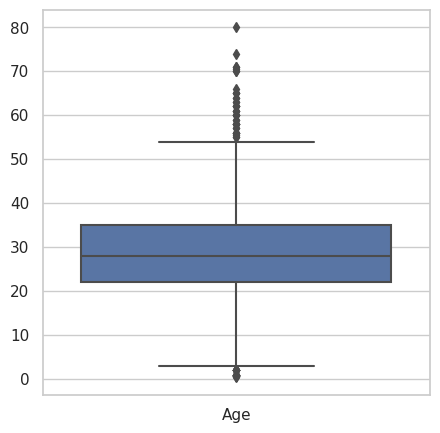

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.boxplot(titanic_num.iloc[:, 3:4])
plt.show()

In [19]:
# Age iqr, lower_f and upper_f
age_iqr, age_q1, age_q3, age_lf, age_uf = iqr(titanic_num["Age"])
print(f"Age:\nIQR : {age_iqr},\nQ1: {age_q1}\t\tQ3: {age_q3}\nLower fence: {age_lf},\nUpper fence: {age_uf}")


Age:
IQR : 13.0,
Q1: 22.0		Q3: 35.0
Lower fence: 2.5,
Upper fence: 54.5


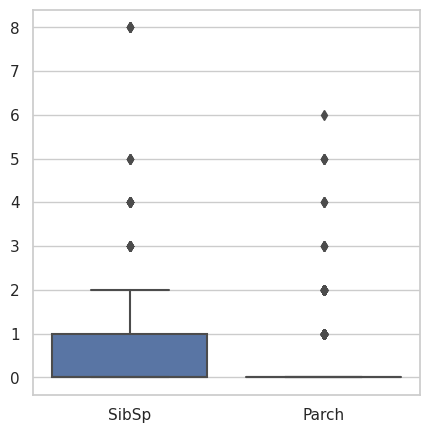

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.boxplot(titanic_num.iloc[:, 4:6])
plt.show()

In [21]:
# SibSp iqr, lower_f and upper_f
sibsp_iqr, sibsp_q1, sibsp_q3, sibsp_lf, sibsp_uf = iqr(titanic_num["SibSp"])
print(f"SibSp:\nIQR : {sibsp_iqr},\nQ1: {sibsp_q1}\t\tQ3: {sibsp_q3}\nLower fence: {sibsp_lf},\nUpper fence: {sibsp_uf}")

print()
# Parch iqr, lower_f and upper_f
parch_iqr, parch_q1, parch_q3, parch_lf, parch_uf = iqr(titanic_num["Parch"])
print(f"Parch:\nIQR : {parch_iqr},\nQ1: {parch_q1}\t\tQ3: {parch_q3}\nLower fence: {parch_lf},\nUpper fence: {parch_uf}")


SibSp:
IQR : 1.0,
Q1: 0.0		Q3: 1.0
Lower fence: -1.5,
Upper fence: 2.5

Parch:
IQR : 0.0,
Q1: 0.0		Q3: 0.0
Lower fence: 0.0,
Upper fence: 0.0


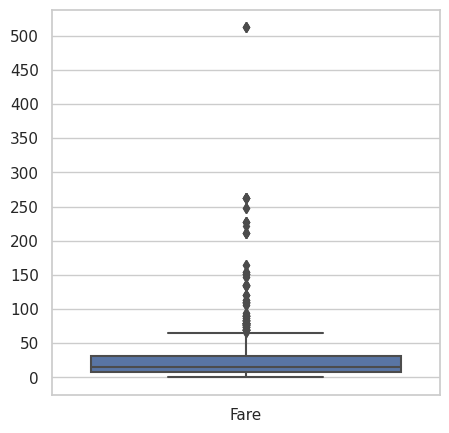

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.boxplot(titanic_num.iloc[:, 6:7])
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.show()

In [43]:
# Fare iqr, lower_f and upper_f
fare_iqr, fare_q1, fare_q3, fare_lf, fare_uf = iqr(titanic_num["Fare"])
print(f"Fare:\nIQR : {fare_iqr},\nQ1: {fare_q1}\t\tQ3: {fare_q3}\nLower fence: {fare_lf},\nUpper fence: {fare_uf}")
print()
print("There are outliers in columns Age, SibSp, Parch, and Fare")

Fare:
IQR : 23.0896,
Q1: 7.9104		Q3: 31.0
Lower fence: -26.724,
Upper fence: 65.6344

There are outliers in columns Age, SibSp, Parch, and Fare


### Trying removing outliers

In [24]:
titanic_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
titanic_num.groupby("Survived").median()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,455.0,3.0,28.0,0.0,0.0,10.5
1,439.5,2.0,28.0,0.0,0.0,26.0


# Distribution Graphs

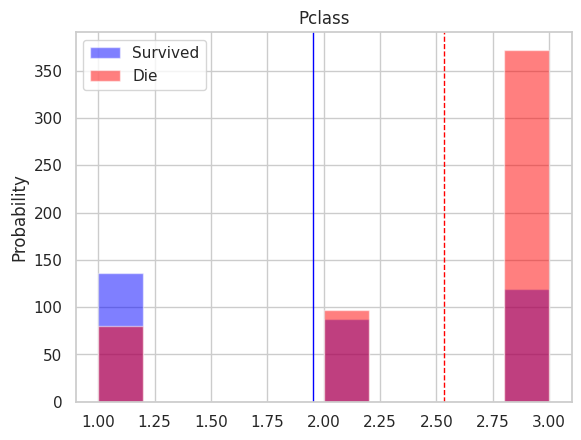

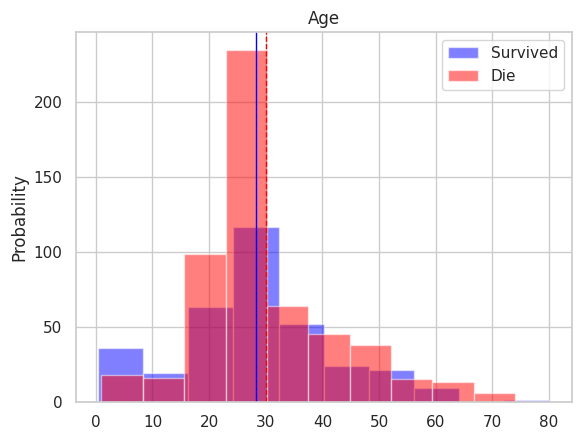

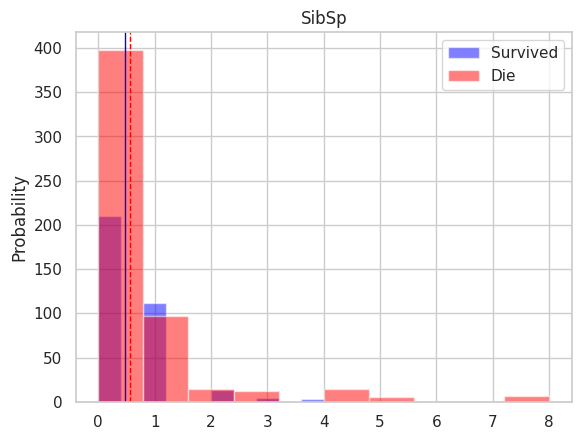

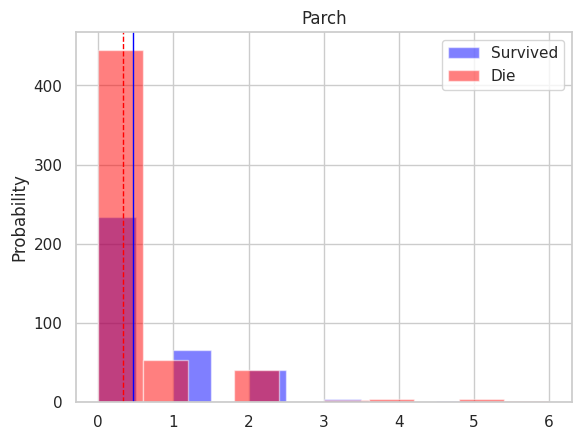

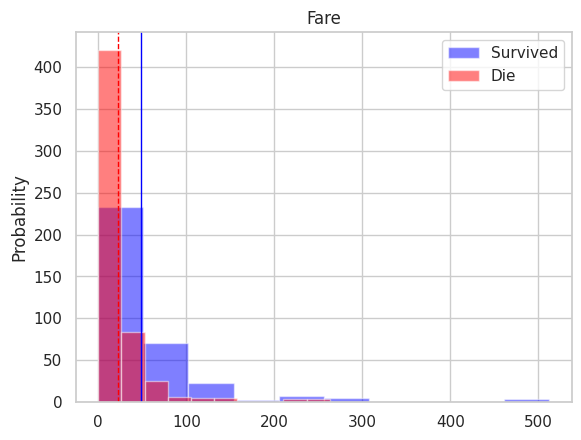

In [26]:
for col in titanic_num.columns[2:]:
    plt.hist(titanic_num[titanic_num.Survived==1][col], color="blue", alpha=.5, label="Survived")
    plt.hist(titanic_num[titanic_num.Survived==0][col], color="red", alpha=.5, label="Die")
    
    median_survived = titanic_num[titanic_num.Survived==1][col].mean()
    median_died = titanic_num[titanic_num.Survived==0][col].mean()
    
    # Draw vertical lines for medians
    plt.axvline(median_survived, color='blue', linestyle='solid', linewidth=1)
    plt.axvline(median_died, color='red', linestyle='dashed', linewidth=1)
    
    plt.title(col)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

Those who are in Pclass 3 have the highest mortality rate
<br>
Higher Fare equals to Lower Pclass(which is for the upper class) have higher survival chance

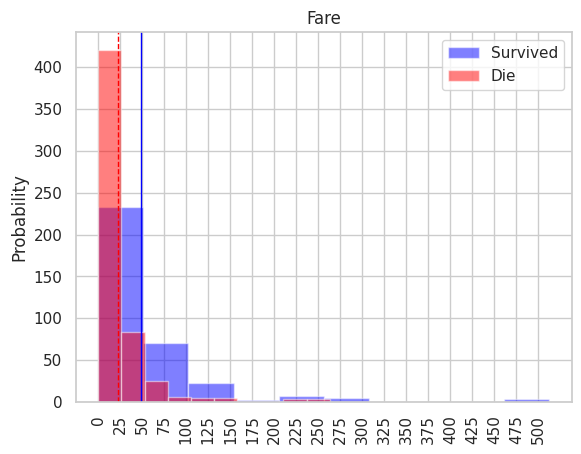

In [27]:
plt.hist(titanic_num[titanic_num.Survived==1]["Fare"], color="blue", alpha=.5, label="Survived")
plt.hist(titanic_num[titanic_num.Survived==0]["Fare"], color="red", alpha=.5, label="Die")

median_survived = titanic_num[titanic_num.Survived==1][col].mean()
median_died = titanic_num[titanic_num.Survived==0][col].mean()

# Draw vertical lines for medians
plt.axvline(median_survived, color='blue', linestyle='solid', linewidth=1)
plt.axvline(median_died, color='red', linestyle='dashed', linewidth=1)

plt.xticks(np.arange(0, max(titanic["Fare"]), 25), rotation="vertical")

plt.title("Fare")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [45]:
overall_death = titanic_num.loc[(titanic_num.Survived==0)  &  (titanic.Fare<=titanic_num["Fare"].max()), "Fare"].count()
overall_death_rate = overall_death/titanic_num["Fare"].count()

death_less_eq_25 = titanic_num.loc[(titanic_num.Survived==0)  &  (titanic.Fare<=titanic_num["Fare"].median()), "Fare"].count()
death_rate = death_less_eq_25/titanic_num["Fare"].count()
print(f"Overall death rate: {overall_death_rate*100}")
print(f"Median death rate: {death_rate*100}")


Overall death rate: 61.61616161616161
Median death rate: 24.691358024691358


If your fare is <=median, 38% mortality rate
<br>
It shows that there is correlation to one's status and their survival

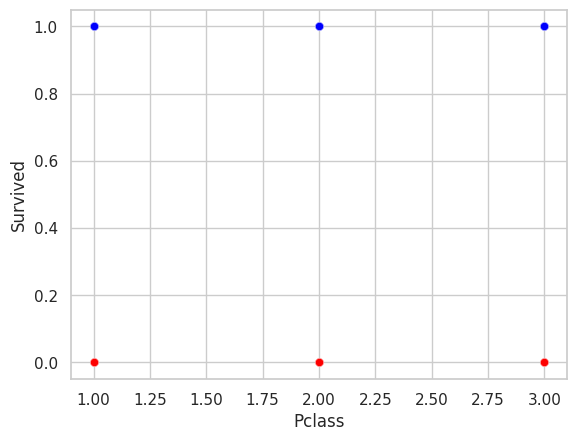

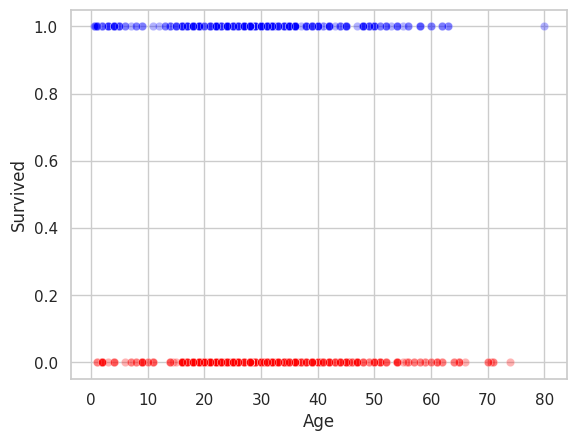

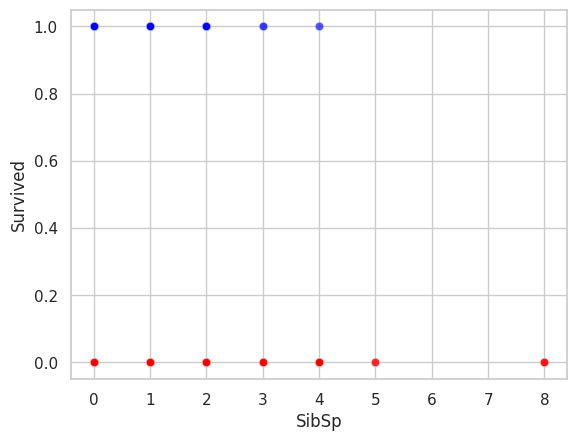

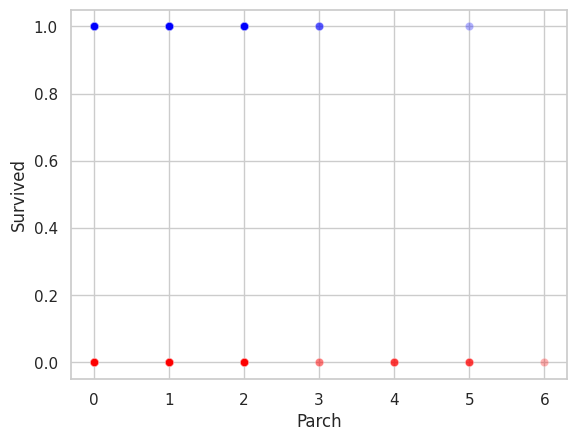

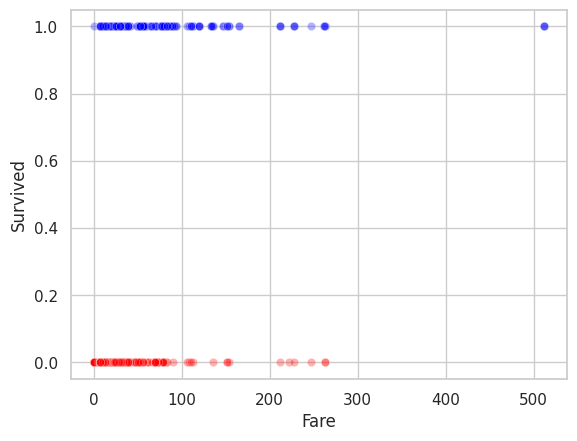

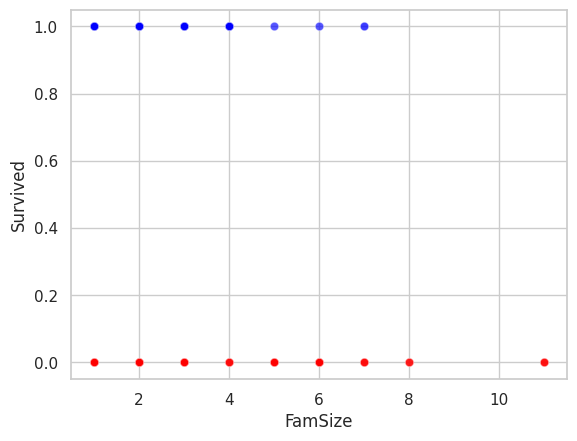

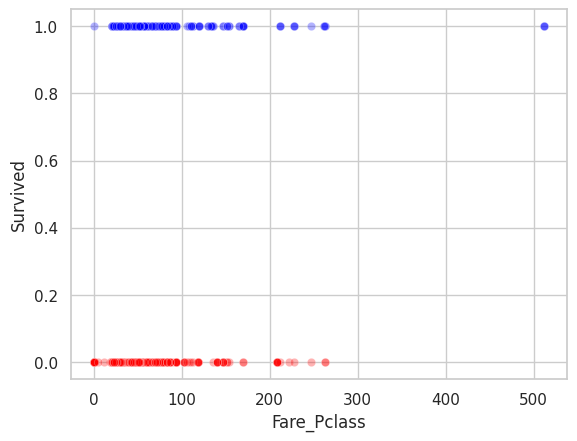

In [63]:
survived_num = titanic_num.loc[titanic_num["Survived"]==1, :]
died_num = titanic_num.loc[titanic_num["Survived"]==0, :]

for col in titanic_num.columns[2:]:
    sns.scatterplot(x=survived_num[col], y=survived_num["Survived"], data=titanic_num, color="blue", alpha=.3)
    sns.scatterplot(x=died_num[col], y=died_num["Survived"], data=titanic_num, color="red", alpha=.3)
    plt.show()
    

Higher Fare have higher Pclass 
<br>
Because people in lower Pclass (e.g. 1) have higher status

In [48]:
titanic_num.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamSize,Fare_Pclass
0,1,0,3,22.0,1,0,7.2500,2,21.7500
1,2,1,1,38.0,1,0,71.2833,2,71.2833
2,3,1,3,26.0,0,0,7.9250,1,23.7750
3,4,1,1,35.0,1,0,53.1000,2,53.1000
4,5,0,3,35.0,0,0,8.0500,1,24.1500
5,6,0,3,28.0,0,0,8.4583,1,25.3749
6,7,0,1,54.0,0,0,51.8625,1,51.8625
7,8,0,3,2.0,3,1,21.0750,5,63.2250
8,9,1,3,27.0,0,2,11.1333,3,33.3999
9,10,1,2,14.0,1,0,30.0708,2,60.1416


# Categorical Data

In [30]:
titanic_s = titanic[["Name", "Sex", "Embarked", "Survived"]]
titanic_s

,Name,Sex,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,1
2,"Heikkinen, Miss. Laina",female,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,1
4,"Allen, Mr. William Henry",male,S,0
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,S,0
887,"Graham, Miss. Margaret Edith",female,S,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,S,0
889,"Behr, Mr. Karl Howell",male,C,1


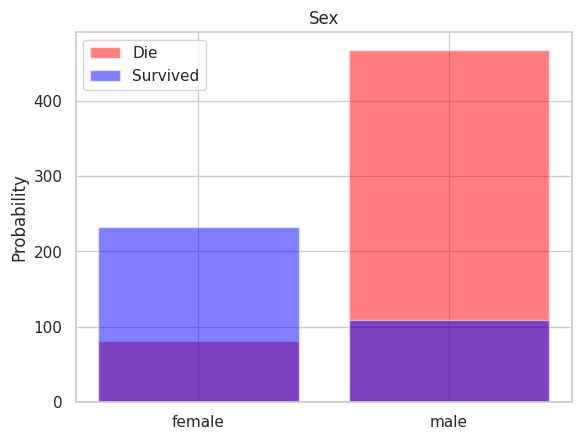

Females have higher survival rate than men


In [47]:
survived_s = titanic_s[titanic_s["Survived"]==1]["Sex"].value_counts().sort_values()
died_s = titanic_s[titanic_s["Survived"]==0]["Sex"].value_counts().sort_values()

plt.bar(died_s.index, died_s, color="red", alpha=.5, label="Die")
plt.bar(survived_s.index, survived_s, color="blue", alpha=.5, label="Survived")
plt.title("Sex")
plt.ylabel("Probability")
plt.legend()
plt.show()

print("Females have higher survival rate than men")

In [32]:
print(survived_s)
print(died_s)

Sex
male      109
female    233
Name: count, dtype: int64
Sex
female     81
male      468
Name: count, dtype: int64


In [46]:
survived_f = survived_s.iloc[1]
female_pop = titanic_s[titanic["Sex"]=="female"]["Sex"].count()
survival_rate_f = survived_f/female_pop
print(f"Women survival rate: {survival_rate_f*100}")

died_m = died_s.iloc[1]
male_pop = titanic_s[titanic["Sex"]=="male"]["Sex"].count()
death_rate_m = died_m/male_pop
print(f"Men mortality rate: {death_rate_m*100}")
print()



Women survival rate: 74.20382165605095
Men mortality rate: 81.10918544194108

Females have higher survival rate than men


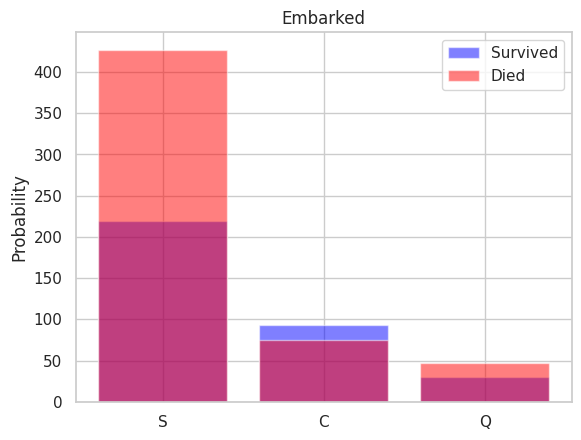

In [34]:
survived_e = titanic_s[titanic_s["Survived"]==1]["Embarked"].value_counts()
died_e = titanic_s[titanic_s["Survived"]==0]["Embarked"].value_counts()
    
    
    
    
plt.bar(survived_e.index, survived_e, color="blue", alpha=.5, label="Survived")
plt.bar(died_e.index, died_e, color="red", alpha=.5, label="Died")
plt.title("Embarked")
plt.ylabel("Probability")
plt.legend()
plt.show()

Those who embarked at C have the highest survival rate

In [35]:
titanic_s[titanic_s["Name"].str.contains(r"\(.*\)")].head(10)

,Name,Sex,Embarked,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,S,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,C,1
15,"Hewlett, Mrs. (Mary D Kingcome)",female,S,1
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,S,0
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,S,1
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,C,1
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,S,0
41,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,S,0


In [36]:
titanic_s

,Name,Sex,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,1
2,"Heikkinen, Miss. Laina",female,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,1
4,"Allen, Mr. William Henry",male,S,0
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,S,0
887,"Graham, Miss. Margaret Edith",female,S,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,S,0
889,"Behr, Mr. Karl Howell",male,C,1


# Feature Engineering

## Categorical Values

In [37]:
titanic_s["Title"] = titanic_s["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

/tmp/ipykernel_33/1932088774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_s["Title"] = titanic_s["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


In [38]:
titanic_s.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

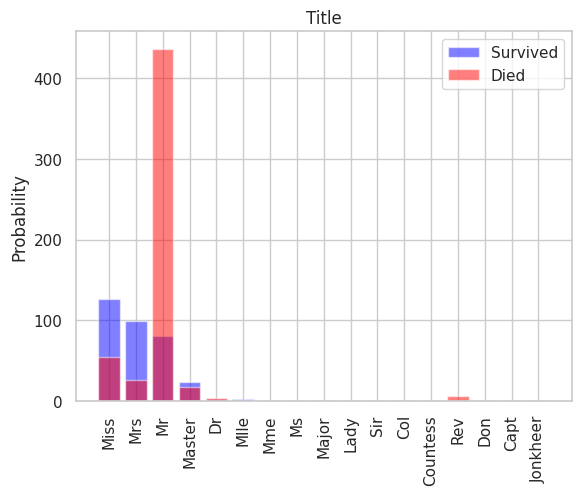

In [39]:
survived_t = titanic_s[titanic_s["Survived"]==1]["Title"].value_counts()
died_t = titanic_s[titanic_s["Survived"]==0]["Title"].value_counts()
    
    
    
    
plt.bar(survived_t.index, survived_t, color="blue", alpha=.5, label="Survived")
plt.bar(died_t.index, died_t, color="red", alpha=.5, label="Died")
plt.title("Title")
plt.ylabel("Probability")
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

People with Mr as their title have the highest death rate

## Numerical Values

In [40]:
titanic_num["FamSize"] = titanic_num["Parch"] + titanic_num["SibSp"] + 1

In [41]:
titanic_num["Fare_Pclass"] = titanic_num["Fare"] * titanic_num["Pclass"]

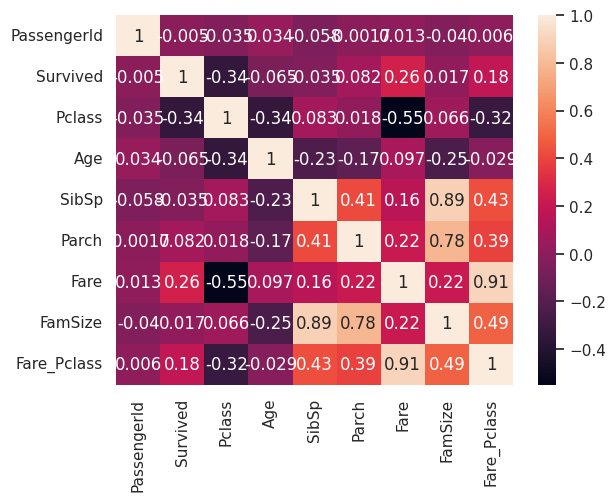

In [42]:
sns.heatmap(titanic_num.corr(), annot=True)
plt.show()